In [2]:
import pandas as pd 
import scipy.stats as stats
import seaborn as sns
import numpy as np
import pingouin as pg
import matplotlib.pyplot as plt
import os

sns.set_theme(style="whitegrid")

filepath = 'Data/'
level = 'Level3.csv'

#find folder of each participant
participants = os.listdir('Data/') 
print(participants)

#find a specific level file inside the participant folder
files = []
for p in participants:
    files.append(filepath+p+'/'+level)
print(files)


#combine different participant's same level data
data = []
for f in files:
    data.append(pd.read_csv(f))

df1 = pd.concat((data), ignore_index=True)


#data1 = pd.read_csv('Data/sampleData.csv')
#data2 = pd.read_csv('sampleData2.csv')
#data_full = pd.read_csv('Data/test.csv')

#noSub = data[data['Do you currently have an active World of Warcraft subscription?'] == 'No'].index
#data.drop(noSub, inplace=True)

#data.reset_index(inplace=True, drop=True) #reset index after dropped rows from full data

df1

['Participant1', 'Participant2']
['Data/Participant1/Level3.csv', 'Data/Participant2/Level3.csv']


D:\miniconda3\lib\site-packages\outdated\utils.py:14: OutdatedPackageWarning: The package outdated is out of date. Your version is 0.2.0, the latest is 0.2.1.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(
D:\miniconda3\lib\site-packages\outdated\utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.3.11, the latest is 0.5.0.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


,Valence,Arousal,Expression
0,0.5,0.4,4
1,0.2,-0.3,3
2,-0.1,-0.1,8
3,-0.4,-0.4,6
4,-0.7,0.7,0
5,0.5,0.4,4
6,0.2,-0.3,3
7,-0.1,-0.1,8
8,-0.4,-0.4,6
9,-0.7,0.7,0


In [3]:
filepath = 'Data/'
level1 = 'Level1.csv'
level2 = 'Level2.csv'
level3 = 'Level3.csv'
# level4 = 'Level4.csv'
# level5 = 'Level5.csv'
# level6 = 'Level6.csv'
# level7 = 'Level7.csv'
# level8 = 'Level8.csv'
# level9 = 'Level9.csv'
# level10 = 'Level10.csv'
# level11 = 'Level11.csv'
# level12 = 'Level12.csv'
# level13 = 'Level13.csv'
# level14 = 'Level14.csv'
# level15 = 'Level15.csv'
# level16 = 'Level16.csv'
# level17 = 'Level17.csv'

#find folder of each participant
participants = os.listdir('Data/') 
print(participants)

#find a specific level file inside the participant folder
files1 = []
files2 = []
files3 = []
files4 = []
files5 = []
files6 = []
files7 = []
files8 = []
files9 = []
files10 = []
files11 = []
files12 = []
files13 = []
files14 = []
files15 = []
files16 = []
files17 = []
for p in participants:
    files1.append(filepath+p+'/'+level1)
    files2.append(filepath+p+'/'+level2)
    files3.append(filepath+p+'/'+level3)
    # files4.append(filepath+p+'/'+level4)
    # files5.append(filepath+p+'/'+level5)
    # files6.append(filepath+p+'/'+level6)
    # files7.append(filepath+p+'/'+level7)
    # files8.append(filepath+p+'/'+level8)
    # files9.append(filepath+p+'/'+level9)
    # files10.append(filepath+p+'/'+level10)
    # files11.append(filepath+p+'/'+level11)
    # files12.append(filepath+p+'/'+level12)
    # files13.append(filepath+p+'/'+level13)
    # files14.append(filepath+p+'/'+level14)
    # files15.append(filepath+p+'/'+level15)
    # files16.append(filepath+p+'/'+level16)
    # files17.append(filepath+p+'/'+level17)
print(files2)

#combine different participant's same level data
data1 = []
data2 = []
data3 = []
data4 = []
data5 = []
data6 = []
data7 = []
data8 = []
data9 = []
data10 = []
data11 = []
data12 = []
data13 = []
data14 = []
data15 = []
data16 = []
data17 = []

for f in files1:
    data1.append(pd.read_csv(f))

for f in files2:
    data2.append(pd.read_csv(f))

for f in files3:
    data3.append(pd.read_csv(f))

# for f in files4:
#     data4.append(pd.read_csv(f))

# for f in files5:
#     data5.append(pd.read_csv(f))

# for f in files6:
#     data6.append(pd.read_csv(f))

# for f in files7:
#     data7.append(pd.read_csv(f))

# for f in files8:
#     data8.append(pd.read_csv(f))

# for f in files9:
#     data9.append(pd.read_csv(f))

# for f in files10:
#     data10.append(pd.read_csv(f))

# for f in files11:
#     data11.append(pd.read_csv(f))

# for f in files12:
#     data12.append(pd.read_csv(f))

# for f in files13:
#     data13.append(pd.read_csv(f))

# for f in files14:
#     data14.append(pd.read_csv(f))

# for f in files15:
#     data15.append(pd.read_csv(f))

# for f in files16:
#     data16.append(pd.read_csv(f))
    
# for f in files17:
#     data17.append(pd.read_csv(f))

df1 = pd.concat((data1), ignore_index=True)
df2 = pd.concat((data2), ignore_index=True)
df3 = pd.concat((data3), ignore_index=True)
# df4 = pd.concat((data4), ignore_index=True)
# df5 = pd.concat((data5), ignore_index=True)
# df6 = pd.concat((data6), ignore_index=True)
# df7 = pd.concat((data7), ignore_index=True)
# df8 = pd.concat((data8), ignore_index=True)
# df9 = pd.concat((data9), ignore_index=True)
# df10 = pd.concat((data10), ignore_index=True)
# df11 = pd.concat((data11), ignore_index=True)
# df12 = pd.concat((data12), ignore_index=True)
# df13 = pd.concat((data13), ignore_index=True)
# df14 = pd.concat((data14), ignore_index=True)
# df15 = pd.concat((data15), ignore_index=True)
# df16 = pd.concat((data16), ignore_index=True)
# df17 = pd.concat((data17), ignore_index=True)

['Participant1', 'Participant2']
['Data/Participant1/Level2.csv', 'Data/Participant2/Level2.csv']


In [4]:
levels = os.listdir('Data/Participant1/')

levels

['Level1.csv', 'Level2.csv', 'Level3.csv']

In [5]:
def add_value_labels(ax, spacing=5):
    """Add labels to the end of each bar in a bar chart.

    Arguments:
        ax (matplotlib.axes.Axes): The matplotlib object containing the axes
            of the plot to annotate.
        spacing (int): The distance between the labels and the bars.
    """

    # For each bar: Place a label
    for rect in ax.patches:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        # Number of points between bar and label. Change to your liking.
        space = spacing
        # Vertical alignment for positive values
        va = 'bottom'

        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'

        # Use Y value as label and format number with 2 decimal places
        label = "{:.3f}".format(y_value)

        # Create annotation
        ax.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',                # Horizontally center label
            va=va)                      # Vertically align label differently for
                                        # positive and negative values.

In [6]:
print(df1.iloc[:, 0])

0       0.012626
1      -0.195107
2       0.061991
3       0.114016
4       0.035768
          ...   
1881   -0.174747
1882   -0.189359
1883   -0.086247
1884   -0.172216
1885   -0.058159
Name: Valence, Length: 1886, dtype: float64


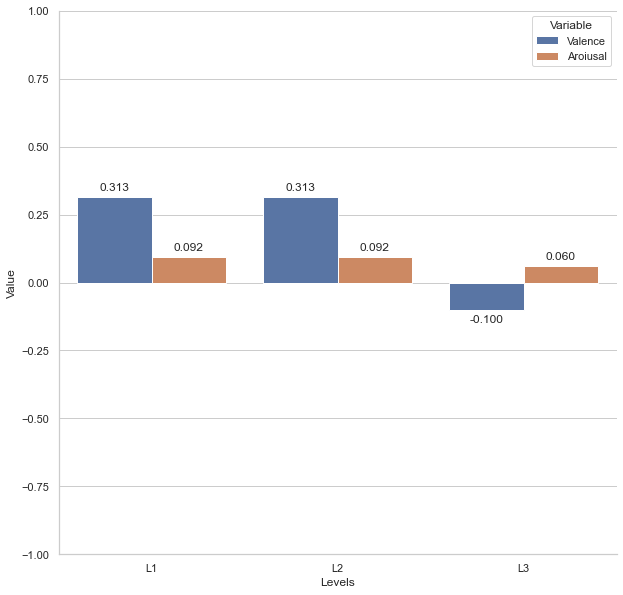

In [7]:
av = df1.iloc[:, 0:2] 

av2 = av.set_axis(['a1', 'v1'], axis=1, inplace=False)
av2

avplot = pd.DataFrame([
        ["L1", df1.iloc[:, 0].mean(), df1.iloc[:, 1].mean()],
        ["L2", df2.iloc[:, 0].mean(), df2.iloc[:, 1].mean()],
        ["L3", df3.iloc[:, 0].mean(), df3.iloc[:, 1].mean()],
        # ["L4", df4.iloc[:, 0].mean(), df4.iloc[:, 1].mean()],
        # ["L5", df5.iloc[:, 0].mean(), df5.iloc[:, 1].mean()],
        # ["L6", df6.iloc[:, 0].mean(), df6.iloc[:, 1].mean()],
        # ["L7", df7.iloc[:, 0].mean(), df7.iloc[:, 1].mean()],
        # ["L8", df8.iloc[:, 0].mean(), df8.iloc[:, 1].mean()],
        # ["L9", df9.iloc[:, 0].mean(), df9.iloc[:, 1].mean()],
        # ["L10", df10.iloc[:, 0].mean(), df10.iloc[:, 1].mean()],
        # ["L11", df11.iloc[:, 0].mean(), df11.iloc[:, 1].mean()],
        # ["L12", df12.iloc[:, 0].mean(), df12.iloc[:, 1].mean()],
        # ["L13", df13.iloc[:, 0].mean(), df13.iloc[:, 1].mean()],
        # ["L14", df14.iloc[:, 0].mean(), df14.iloc[:, 1].mean()],
        # ["L15", df15.iloc[:, 0].mean(), df15.iloc[:, 1].mean()],
        # ["L16", df16.iloc[:, 0].mean(), df16.iloc[:, 1].mean()],
        # ["L17", df17.iloc[:, 0].mean(), df17.iloc[:, 1].mean()]
         ],  
        columns = ["Levels", "Valence", "Aroiusal"])

fig, ax1 = plt.subplots(figsize=(10, 10))
tidy = avplot.melt(id_vars='Levels').rename(columns=str.title)
sns.barplot(x='Levels', y='Value', hue='Variable', data=tidy, ax=ax1)
sns.despine(fig)
ax1.yaxis.grid(True)
ax1.set_axisbelow(True)
plt.ylim(bottom = -1,top = 1)
add_value_labels(ax1)

In [17]:
#Arousal + Valence
av = df1.iloc[:, 0:2] 

#av["AV"] = av[["arousal","valence"]].apply(tuple, axis=1)
                
av1 = av[["arousal","valence"]].apply(tuple, axis=1)



av2 = av[["arousal","valence"]].apply(tuple, axis=1)

av3 = pd.DataFrame(av1)

av4 = pd.DataFrame(av2)
    
av3["av2"] = av4

av5.reset_index(inplace=True, drop=True)
av3

#tuples = list(av.itertuples(index=False, name=None))
#print(tuples)
#tuples

#av1 = av.iloc[:, 2] 
#print(av1)

#av2 = df1.iloc[:, 0:2] 
#av2["AV"] = av2[["arousal","valence"]].apply(tuple, axis=1)    

KeyError: "None of [Index(['arousal', 'valence'], dtype='object')] are in the [columns]"

[(-1.0, 1.0)]

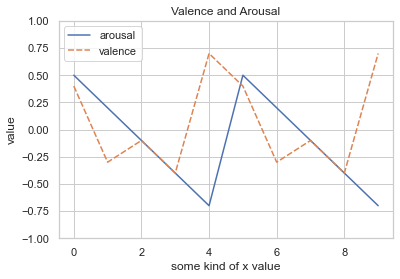

In [ ]:
ax = sns.lineplot(data=av)
ax.set(xlabel='some kind of x value', ylabel='value', title='Valence and Arousal')
ax.set(ylim=(-1, 1))

In [16]:
#Combine all valence and arousal values

# combinedf = pd.concat([df1.iloc[:, 0:2], df2.iloc[:, 0:2], df3.iloc[:, 0:2], df4.iloc[:, 0:2], df5.iloc[:, 0:2], 
#                        df6.iloc[:, 0:2], df7.iloc[:, 0:2], df8.iloc[:, 0:2], df9.iloc[:, 0:2], df10.iloc[:, 0:2],
#                        df11.iloc[:, 0:2], df12.iloc[:, 0:2], df13.iloc[:, 0:2], df14.iloc[:, 0:2], df15.iloc[:, 0:2],  
#                        df16.iloc[:, 0:2], df17.iloc[:, 0:2]], axis=0, ignore_index=True)

combinedf = pd.concat([df1.iloc[:, 0:2], df2.iloc[:, 0:2], df3.iloc[:, 0:2]], axis=0, ignore_index=True)

[(-1.0, 1.0)]

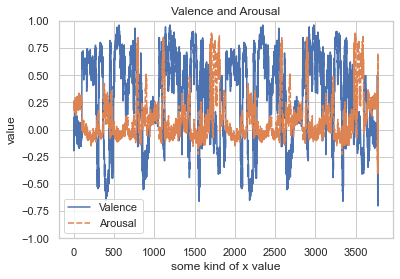

In [18]:
ax = sns.lineplot(data=combinedf)
ax.set(xlabel='some kind of x value', ylabel='value', title='Valence and Arousal')
ax.set(ylim=(-1, 1))

In [ ]:
avMean = (df.iloc[:, 0:2]).mean()

avMeanTable = pd.DataFrame([avMean], columns=['Arousal', 'Valence'])
avMeanTable

,Arousal,Valence
0,0.092318,0.312806


[(-1.0, 1.0)]

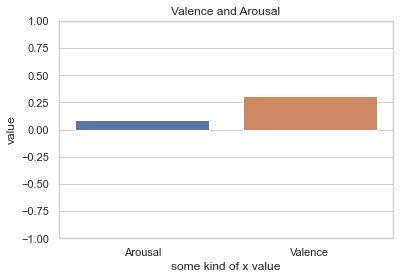

In [ ]:
ax = sns.barplot(data=avMeanTable)
ax.set(xlabel='some kind of x value', ylabel='value', title='Valence and Arousal')
ax.set(ylim=(-1, 1))

In [24]:
#Expression only
expression = df1.iloc[:, 2]

#Remap the integers into words
mapping = {0: 'Neutral', 1: 'Happy', 2: 'Sad', 3: 'Surprise', 4: 'Fear', 5: 'Disgust', 6: 'Anger', 7: 'Contempt'}
expressionCategories = ['Neutral', 'Happy', 'Sad', 'Surprise', 'Fear', 'Disgust', 'Anger', 'Contempt']

expressionLabeled = expression.map(mapping)

expression
expressionLabeled

0       Contempt
1        Neutral
2          Happy
3          Happy
4       Contempt
          ...   
1881    Contempt
1882    Contempt
1883    Contempt
1884    Contempt
1885     Neutral
Name: Expression, Length: 1886, dtype: object

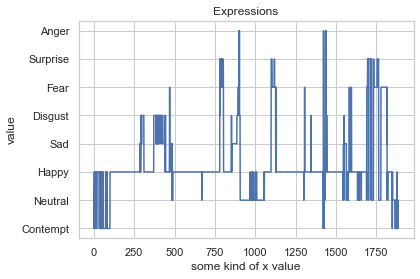

In [60]:
ax = sns.lineplot(data=expressionLabeled)

ax.set(xlabel='some kind of x value', ylabel='value', title='Expressions')
plt.yticks(expressionCategories)
plt.gca().invert_yaxis()
#ax.set(ylim=())

In [ ]:
checkOne = data_full.loc[(data_full['Please indicate your age'] == 66)]

#checkOne

NameError: name 'data_full' is not defined

In [ ]:
df = data.iloc[:, 7:28]

df.columns = ["A1", "A2", "A3", "A4", "A5", "A6", 
              "C7", "C8", "C9", "C10", "C11", "C12",
              "R13", "R14", "R15", "R16", "R17", "R18", "R19", "R20", "R21"]

df["Score"] = df.mean(axis = 1)
df["Gender"] = data["Please indicate your gender"]
df["Age"] = data["Please indicate your age"]
df["Country"]=data["Please indicate your country of residence"]

df

,A1,A2,A3,A4,A5,A6,C7,C8,C9,C10,C11,C12,R13,R14,R15,R16,R17,R18,R19,R20,R21,Score,Gender,Age,Country
0,1.0,1.0,1.0,5.0,2.0,2.0,5.0,4.0,4.0,3.0,3.0,4.0,5.0,4.0,5.0,4.0,4.0,5.0,2.0,3.0,3.0,3.333333,Female,32.0,USA
1,4.0,4.0,3.0,4.0,2.0,4.0,5.0,5.0,5.0,3.0,4.0,4.0,4.0,3.0,4.0,5.0,5.0,4.0,4.0,4.0,4.0,4.000000,Male,24.0,Germany
2,4.0,5.0,4.0,4.0,4.0,5.0,5.0,4.0,5.0,3.0,4.0,4.0,5.0,5.0,4.0,4.0,4.0,5.0,5.0,4.0,5.0,4.380952,Female,29.0,Ireland
3,2.0,3.0,3.0,3.0,2.0,3.0,4.0,4.0,4.0,4.0,4.0,4.0,5.0,5.0,4.0,4.0,2.0,4.0,3.0,2.0,3.0,3.428571,Female,34.0,Canada
4,3.0,2.0,2.0,4.0,1.0,2.0,4.0,5.0,4.0,5.0,4.0,4.0,5.0,5.0,3.0,4.0,3.0,3.0,4.0,3.0,2.0,3.428571,Male,41.0,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
557,5.0,5.0,5.0,4.0,4.0,3.0,4.0,4.0,4.0,3.0,3.0,3.0,3.0,3.0,3.0,4.0,4.0,4.0,4.0,4.0,5.0,3.857143,Female,66.0,USA
558,1.0,2.0,1.0,2.0,3.0,2.0,5.0,5.0,5.0,5.0,5.0,3.0,5.0,5.0,5.0,2.0,2.0,3.0,3.0,3.0,4.0,3.380952,Female,31.0,United States of America
559,3.0,4.0,4.0,2.0,1.0,1.0,5.0,5.0,5.0,2.0,5.0,4.0,5.0,5.0,4.0,5.0,5.0,5.0,5.0,4.0,5.0,4.000000,Female,23.0,Brazil
560,5.0,5.0,5.0,5.0,5.0,5.0,5.0,4.0,5.0,5.0,5.0,5.0,5.0,5.0,4.0,5.0,5.0,5.0,5.0,5.0,5.0,4.904762,Male,44.0,USA


## Demographic Information

In [ ]:
female = df.loc[(df['Gender'] == "Female", "A1")]
male = df.loc[(df['Gender'] == "Male", "A1")]
nonbinary = df.loc[(df['Gender'] == "Non-binary", "A1")]
other = df.loc[(df['Gender'] == "Other", "A1")]

print("Females: " + str(female.count()))
print("Males: " + str(male.count()))
print("Non-binary: " + str(nonbinary.count()))
print("Other: " + str(other.count()))

Females: 183
Males: 360
Non-binary: 18
Other: 1


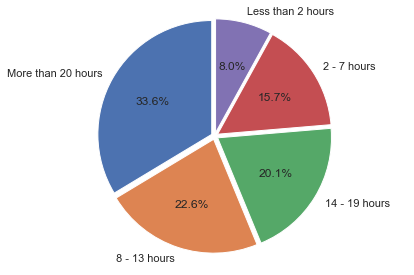

In [ ]:
hours = data['How many hours each week (on average) do you spend playing World of Warcraft: Shadowlands?'].value_counts()
labels = ['More than 20 hours', '8 - 13 hours', '14 - 19 hours', '2 - 7 hours', 'Less than 2 hours']

fig1, ax1 = plt.subplots()
ax1.pie(hours, autopct='%1.1f%%', labels=labels, shadow=False, startangle=90, radius=5, explode=[0.15]*5)
ax1.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle
#plt.title("Delivery Tips by type", fontsize=10);
plt.tight_layout()
plt.show()

In [ ]:
hours = data['How many hours each week (on average) do you spend playing World of Warcraft: Shadowlands?'].value_counts().to_dict()
hours

{'More than 20 hours a week': 189,
 '8 - 13 hours a week': 127,
 '14 - 19 hours a week': 113,
 '2 - 7 hours a week': 88,
 'Less than 2 hours a week': 45}

## Separate Questions & Scores

In [ ]:
autonomy = df.iloc[:, 0:6]
autonomy["Score"] = autonomy.mean(axis = 1)
autonomyScore = autonomy["Score"]

autonomy

,A1,A2,A3,A4,A5,A6,Score
0,1.0,1.0,1.0,5.0,2.0,2.0,2.000000
1,4.0,4.0,3.0,4.0,2.0,4.0,3.500000
2,4.0,5.0,4.0,4.0,4.0,5.0,4.333333
3,2.0,3.0,3.0,3.0,2.0,3.0,2.666667
4,3.0,2.0,2.0,4.0,1.0,2.0,2.333333
...,...,...,...,...,...,...,...
557,5.0,5.0,5.0,4.0,4.0,3.0,4.333333
558,1.0,2.0,1.0,2.0,3.0,2.0,1.833333
559,3.0,4.0,4.0,2.0,1.0,1.0,2.500000
560,5.0,5.0,5.0,5.0,5.0,5.0,5.000000


In [ ]:
competence = df.iloc[:, 6:12]
competence["Score"] = competence.mean(axis = 1)
competenceScore = competence["Score"]

competence

,C7,C8,C9,C10,C11,C12,Score
0,5.0,4.0,4.0,3.0,3.0,4.0,3.833333
1,5.0,5.0,5.0,3.0,4.0,4.0,4.333333
2,5.0,4.0,5.0,3.0,4.0,4.0,4.166667
3,4.0,4.0,4.0,4.0,4.0,4.0,4.000000
4,4.0,5.0,4.0,5.0,4.0,4.0,4.333333
...,...,...,...,...,...,...,...
557,4.0,4.0,4.0,3.0,3.0,3.0,3.500000
558,5.0,5.0,5.0,5.0,5.0,3.0,4.666667
559,5.0,5.0,5.0,2.0,5.0,4.0,4.333333
560,5.0,4.0,5.0,5.0,5.0,5.0,4.833333


In [ ]:
relate = df.iloc[:, 12:21]
relate["Score"] = relate.mean(axis = 1)
relateScore = relate["Score"]

relate

,R13,R14,R15,R16,R17,R18,R19,R20,R21,Score
0,5.0,4.0,5.0,4.0,4.0,5.0,2.0,3.0,3.0,3.888889
1,4.0,3.0,4.0,5.0,5.0,4.0,4.0,4.0,4.0,4.111111
2,5.0,5.0,4.0,4.0,4.0,5.0,5.0,4.0,5.0,4.555556
3,5.0,5.0,4.0,4.0,2.0,4.0,3.0,2.0,3.0,3.555556
4,5.0,5.0,3.0,4.0,3.0,3.0,4.0,3.0,2.0,3.555556
...,...,...,...,...,...,...,...,...,...,...
557,3.0,3.0,3.0,4.0,4.0,4.0,4.0,4.0,5.0,3.777778
558,5.0,5.0,5.0,2.0,2.0,3.0,3.0,3.0,4.0,3.555556
559,5.0,5.0,4.0,5.0,5.0,5.0,5.0,4.0,5.0,4.777778
560,5.0,5.0,4.0,5.0,5.0,5.0,5.0,5.0,5.0,4.888889


## Dataframe of all Scores

In [ ]:
scoreTable = pd.DataFrame(autonomy["Score"])
del scoreTable['Score']

scoreTable["Autonomy"] = autonomy["Score"]
scoreTable["Competence"] = competence["Score"]
scoreTable["Relatedness"] = relate["Score"]

scoreTable

,Autonomy,Competence,Relatedness
0,2.000000,3.833333,3.888889
1,3.500000,4.333333,4.111111
2,4.333333,4.166667,4.555556
3,2.666667,4.000000,3.555556
4,2.333333,4.333333,3.555556
...,...,...,...
557,4.333333,3.500000,3.777778
558,1.833333,4.666667,3.555556
559,2.500000,4.333333,4.777778
560,5.000000,4.833333,4.888889


In [ ]:
scoreTable.corr()

,Autonomy,Competence,Relatedness
Autonomy,1.000000,0.411086,0.419165
Competence,0.411086,1.000000,0.449146
Relatedness,0.419165,0.449146,1.000000


In [ ]:
pg.cronbach_alpha(scoreTable)

(0.6730018125981416, array([0.623, 0.717]))

## Dataframe of total means

In [ ]:
autonomySeparateMean = autonomy.mean()
autonomyTotalMean = autonomySeparateMean.mean()

competenceSeparateMean = competence.mean()
competenceTotalMean = competenceSeparateMean.mean()

relateSeparateMean = relate.mean()
relateTotalMean = relateSeparateMean.mean()

totalMeanTable = pd.DataFrame([[autonomyTotalMean, competenceTotalMean, relateTotalMean]], columns=['Autonomy', 'Competence', 'Relatedness'])
totalMeanTable

,Autonomy,Competence,Relatedness
0,3.242289,4.254152,3.655991


In [ ]:
scoreTable.std()

Autonomy       0.923261
Competence     0.656494
Relatedness    0.661777
dtype: float64

## Visualization

In [ ]:
def add_value_labels(ax, spacing=5):
    """Add labels to the end of each bar in a bar chart.

    Arguments:
        ax (matplotlib.axes.Axes): The matplotlib object containing the axes
            of the plot to annotate.
        spacing (int): The distance between the labels and the bars.
    """

    # For each bar: Place a label
    for rect in ax.patches:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        # Number of points between bar and label. Change to your liking.
        space = spacing
        # Vertical alignment for positive values
        va = 'bottom'

        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'

        # Use Y value as label and format number with 2 decimal places
        label = "{:.3f}".format(y_value)

        # Create annotation
        ax.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',                # Horizontally center label
            va=va)                      # Vertically align label differently for
                                        # positive and negative values.

In [ ]:
df = pd.DataFrame( {'':['Autonomy', 'Competence', 'Relatedness' ],
                   'val':[autonomyTotalMean, competenceTotalMean, relateTotalMean]})

#ax = df.plot.bar(x='', y='val', rot=0, figsize=(10,7), ylim = (1, 5), legend=False, title = 'Total mean comparison', color=['green', 'purple', 'blue'])

#ax.yaxis.grid(True)
#ax.set_ylabel('Mean', fontsize=10)
#ax.set_axisbelow(True)
#add_value_labels(ax)

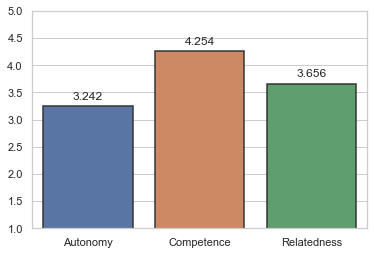

In [ ]:
ax = sns.barplot(data=totalMeanTable, linewidth=1.5, edgecolor=".2")
ax.set(ylim=(1, 5))
add_value_labels(ax)

In [ ]:
#boxplot = scoreTable.boxplot()

[(0.8, 5.2)]

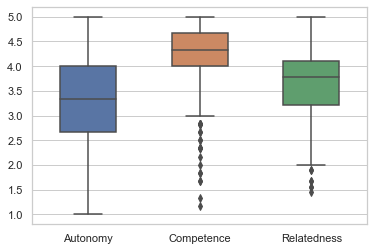

In [ ]:
ax = sns.boxplot(data=scoreTable, linewidth=1.5, width=0.5)
ax.set(ylim=(0.8, 5.2))

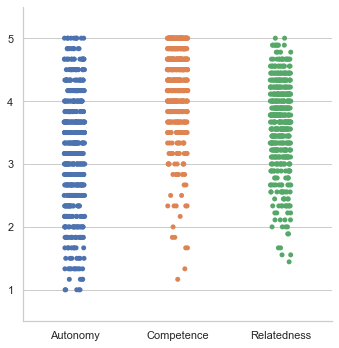

In [ ]:
ax1 = sns.catplot(kind = "strip", data = scoreTable)
ax1.set(ylim=(0.5, 5.5))

In [ ]:
#totalScore = (autonomy.mean(axis = 1) + competence.mean(axis = 1) + relate.mean(axis = 1))
#totalScore

# Parametric Tests

## Normal Distribution

              W      pval  normal
Score  0.981967  0.000002   False
AndersonResult(statistic=2.354961913320949, critical_values=array([0.572, 0.651, 0.781, 0.912, 1.084]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))


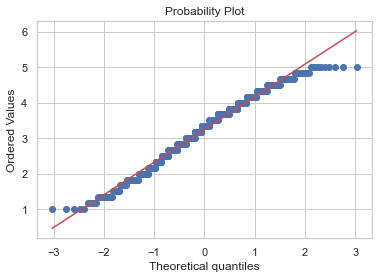

In [ ]:
print(pg.normality(autonomyScore)) #Shapiro-Wilk test for normality
#print(pg.anderson(autonomyScore)) #Anderson-Darling test for normality
print(stats.anderson(autonomyScore)) #Anderson-Darling test for normality

stats.probplot(autonomyScore, plot = plt) #Q-Q plot - visualization of normality
plt.show()

              W          pval  normal
Score  0.885712  5.792157e-20   False
AndersonResult(statistic=14.038244542469783, critical_values=array([0.572, 0.651, 0.781, 0.912, 1.084]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))


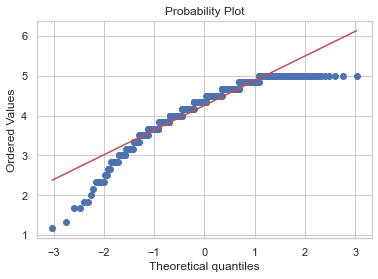

In [ ]:
print(pg.normality(competenceScore)) #Shapiro-Wilk test for normality
#print(pg.anderson(competenceScore)) #Anderson-Darling test for normality
print(stats.anderson(competenceScore)) #Anderson-Darling test for normality

stats.probplot(competenceScore, plot = plt) #Q-Q plot - visualization of normality
plt.show()

              W          pval  normal
Score  0.973556  1.546499e-08   False
AndersonResult(statistic=3.728848459885967, critical_values=array([0.572, 0.651, 0.781, 0.912, 1.084]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))


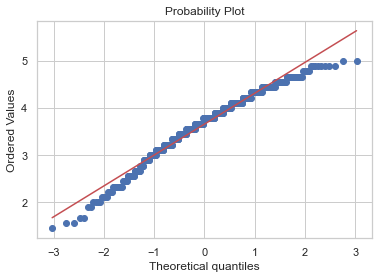

In [ ]:
print(pg.normality(relateScore)) #Shapiro-Wilk test for normality
#print(pg.anderson(relateScore)) #Anderson-Darling test for normality
print(stats.anderson(relateScore)) #Anderson-Darling test for normality

stats.probplot(relateScore, plot = plt) #Q-Q plot - visualization of normality
plt.show()

In [ ]:
result = stats.anderson(relateScore)
print('Statistic: %.3f' % result.statistic)
p = 0
for i in range(len(result.critical_values)):
	sl, cv = result.significance_level[i], result.critical_values[i]
	if result.statistic < result.critical_values[i]:
		print('%.3f: %.3f, data looks normal (fail to reject H0)' % (sl, cv))
	else:
		print('%.3f: %.3f, data does not look normal (reject H0)' % (sl, cv))

Statistic: 3.729
15.000: 0.572, data does not look normal (reject H0)
10.000: 0.651, data does not look normal (reject H0)
5.000: 0.781, data does not look normal (reject H0)
2.500: 0.912, data does not look normal (reject H0)
1.000: 1.084, data does not look normal (reject H0)


In [ ]:
stat, p = stats.shapiro(autonomyScore)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=0.982, p=0.000
Sample does not look Gaussian (reject H0)


## Equal Variance

In [ ]:
print(stats.levene(autonomyScore, competenceScore))

LeveneResult(statistic=82.89052453005725, pvalue=3.8670696777549413e-19)


In [ ]:
print(stats.levene(competenceScore, relateScore))

LeveneResult(statistic=1.1061373540142343, pvalue=0.29314960199783535)


In [ ]:
print(stats.levene(autonomyScore, relateScore))

LeveneResult(statistic=68.47086085769473, pvalue=3.619096179845437e-16)


In [ ]:
print(stats.levene(autonomyScore, competenceScore, relateScore))

LeveneResult(statistic=54.463092864427885, pvalue=1.2047752449504271e-23)


## Parametric - Pearson's r

In [ ]:
#print(stats.pearsonr(autonomyScore, competenceScore))
print(pg.corr(autonomyScore, competenceScore))

           n         r         CI95%        r2    adj_r2         p-val       BF10  power
pearson  562  0.411086  [0.34, 0.48]  0.168992  0.166019  2.508854e-24  1.425e+21    1.0


In [ ]:
#print(stats.pearsonr(competenceScore, relateScore))
print(pg.corr(competenceScore, relateScore))

           n         r         CI95%        r2    adj_r2         p-val       BF10  power
pearson  562  0.449146  [0.38, 0.51]  0.201732  0.198876  2.977523e-29  1.057e+26    1.0


In [ ]:
#print(stats.pearsonr(autonomyScore, relateScore))
print(pg.corr(autonomyScore, relateScore))

           n         r         CI95%        r2   adj_r2         p-val       BF10  power
pearson  562  0.419165  [0.35, 0.49]  0.175699  0.17275  2.544942e-25  1.367e+22    1.0


## Non-Parametric - Spearman's ρ

In [ ]:
print(pg.corr(autonomyScore, competenceScore, method = 'spearman'))

            n         r         CI95%       r2    adj_r2         p-val  power
spearman  562  0.417325  [0.35, 0.48]  0.17416  0.171206  4.309265e-25    1.0


In [ ]:
print(pg.corr(competenceScore, relateScore, method = 'spearman'))

            n         r         CI95%        r2    adj_r2         p-val  power
spearman  562  0.400878  [0.33, 0.47]  0.160703  0.157701  4.140185e-23    1.0


In [ ]:
print(pg.corr(autonomyScore, relateScore, method = 'spearman'))

            n       r         CI95%       r2    adj_r2         p-val  power
spearman  562  0.4084  [0.34, 0.48]  0.16679  0.163809  5.296493e-24    1.0
